In [5]:
import sys
import os

current_dir = os.getcwd() 
project_root = os.path.abspath(os.path.join(current_dir, '..'))

if project_root not in sys.path:
    sys.path.insert(0, project_root)

import matplotlib.pyplot as plt
from analysis.overlaping_analyse import Analyse
from dataset_splitter.MapSatellite import MapSatellite
from main import PipelineConfig


In [6]:
def quick_load_map_satellite(config: PipelineConfig, d_conf: dict) -> MapSatellite:
    region_name = d_conf["region_name"]

    output_csv_path = config.DATAFRAMES_ONE_TO_ONE_DIR / f"{region_name}.csv"
    
    map_tif_path = (
        config.UAV_VISLOC_ROOT
        / d_conf["uav_visloc_id"]
        / d_conf["map_filename"]
    )
    
    satellite_coords_csv = str(
        config.UAV_VISLOC_ROOT / "satellite_ coordinates_range.csv"
    )
    
    friendly_name = f"visloc-{region_name}-{d_conf['uav_visloc_id']}-satellite"

    map_sat = MapSatellite(
        csv_path=satellite_coords_csv,
        tiles_satellite_csv_output_path=str(output_csv_path),
        map_tif_path=str(map_tif_path),
        region_name=region_name,
        friendly_name=friendly_name,
    )
    
    print(f"Loaded for: {region_name}")
    return map_sat

Loaded for: Taizhou-1


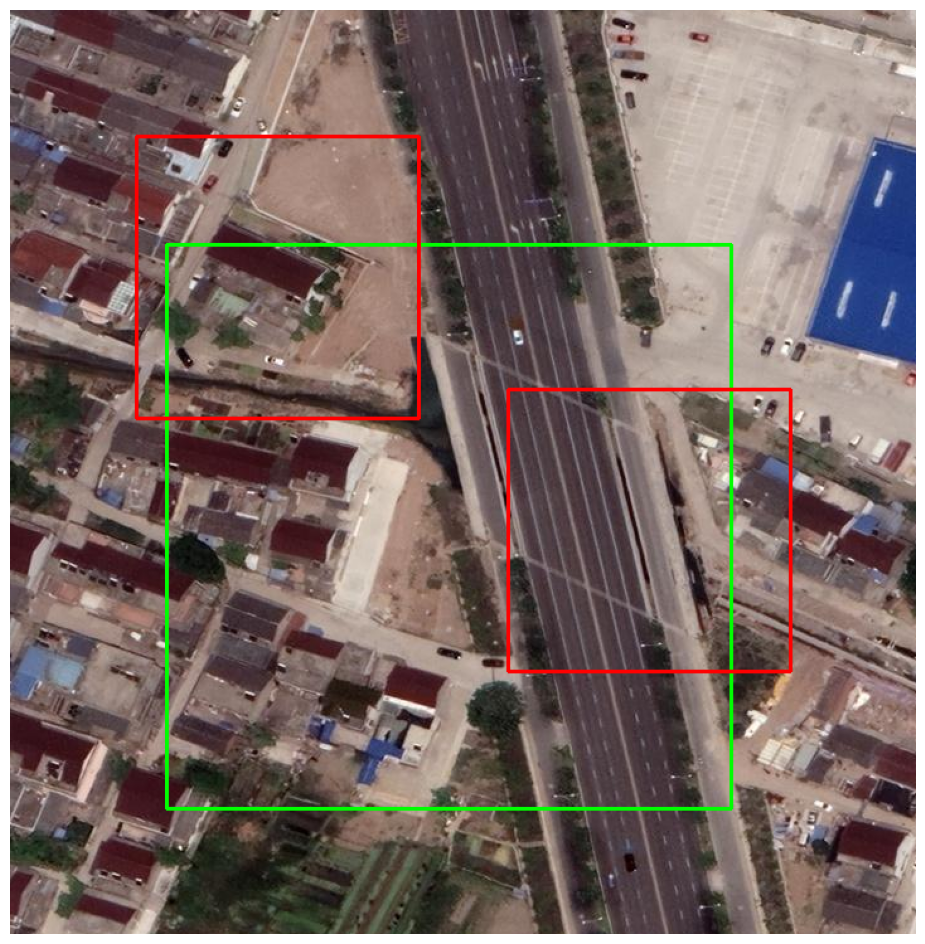

In [9]:

config = PipelineConfig()
config.DATAFRAMES_ROOT.mkdir(parents=True, exist_ok=True)

DATA_CONFIG = [
    {
        "set_type": "train",
        "region_name": "Taizhou-1",
        "uav_visloc_id": "03",
        "map_filename": "satellite03.tif",
    }
]

target_config = DATA_CONFIG[0]


try:
    DATA_CSV_PATH = '/home/user/PycharmProjects/drone-loc-no-gps/Dataframes/one_to_one/Taizhou-1.csv'
    sat_map_object = quick_load_map_satellite(config, target_config)
    analyser = Analyse(csv_path=DATA_CSV_PATH, satellite_map=sat_map_object)
    
    analyser.load_map()
    
    plt.figure(figsize=(12, 12)) 
    
    analyser.draw_boxes()
    
    plt.axis('off') 
    plt.show()
    
except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")